## Predict Onset of Diabetes

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [57]:
# load data
dataset = pd.read_csv('breast-cancer.csv', delimiter=",")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [59]:
#5 first entries
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
# split data into X and y
X = dataset.drop('diabetes', axis=1)
Y = dataset.diabetes

In [46]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [47]:
# train and fit our xgboost
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

**By default, the predict() made by XGBoost are binary, we'll need to use predict_proba() for probabilities**

In [48]:
# test our model on the testing data
y_pred = xgboost.predict_proba(X_test)
# display first 5 samples
y_pred[:5]

array([[ 0.95664507,  0.04335495],
       [ 0.09737819,  0.90262181],
       [ 0.5662939 ,  0.4337061 ],
       [ 0.98075575,  0.01924424],
       [ 0.52957165,  0.47042832]], dtype=float32)

In [49]:
# Above shows negative '0', then postive probability
# Get just the prediction for the positive class (1)
y_pred1 = [pred[1] for pred in y_pred]
y_pred1[:10]

[0.043354951,
 0.90262181,
 0.4337061,
 0.019244237,
 0.47042832,
 0.70459241,
 0.026445301,
 0.036413182,
 0.91524285,
 0.38610107]

# Area under ROC curve

Area under ROC curve is a strong, reliable metric for classification tasks.

Area under ROC curve is equivalent to the probability that a randomly chosen '0' observation ranks higher (has a higher predicted probability) than a randomly chosen '1' observation.

Since it's choosing one random positve and one random negative, it doesn't care about imbalanced classes.

In [50]:
#import metrics
from sklearn.metrics import roc_curve, auc

We calculate the ROC curve for our Xgboost model using the roc_curve() function that we imported earlier.

roc_curve() returns 3 lists of equal length:

1. False positive rates
2. True positive rates
3. And the thresholds at which the those were calculated.

In [51]:
# Calculate ROC curve from y_test and y_pred1
fpr, tpr, thresh = roc_curve(y_test, y_pred1)

In [52]:
# Store fpr, tpr, thresholds in DataFrame and display last 10
roc = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresh})
roc.tail(10)

,FPR,TPR,Thresholds
55,0.475410,0.900000,0.148364
56,0.508197,0.900000,0.127391
57,0.508197,0.914286,0.126266
58,0.524590,0.914286,0.111493
59,0.524590,0.942857,0.092449
60,0.680328,0.942857,0.054396
61,0.680328,0.957143,0.051990
62,0.745902,0.957143,0.036418
63,0.745902,1.000000,0.033954
64,1.000000,1.000000,0.003735


- Plotting our model's entire curve ROC curve to visualize the relationship between TPR (True Positive Rate) and FPR (False Positive Rate) across our model's threshold values
- also plotting ROC curve of a hypothetical model that makes completely random predictions for heuristic reasons (dashed line).

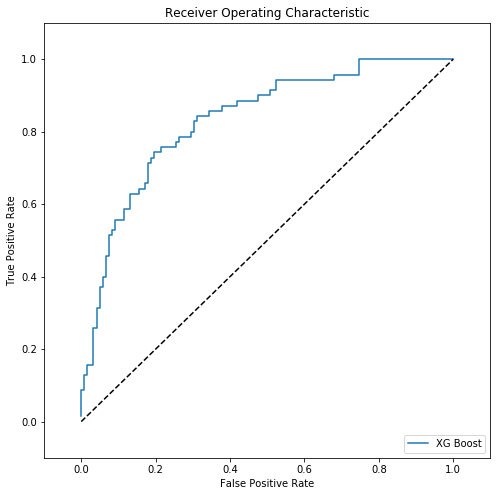

In [53]:

# Initialize figure
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='XG Boost')
plt.legend(loc='lower right')

# Diagonal 45 degree line
# ROC curve of a completely random model
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Calcualting Aeea underneath ROC curve (AUROC).**

In [55]:
# Calculate ROC curve again because repetition is the mother of learning
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
# Calculate AUROC
print( auc(fpr, tpr))

0.833255269321
